<a href="https://colab.research.google.com/github/anushkaa-10/MachineL/blob/main/KmeansSample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
%matplotlib inline

In [2]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [3]:
X.shape

(1000, 2)

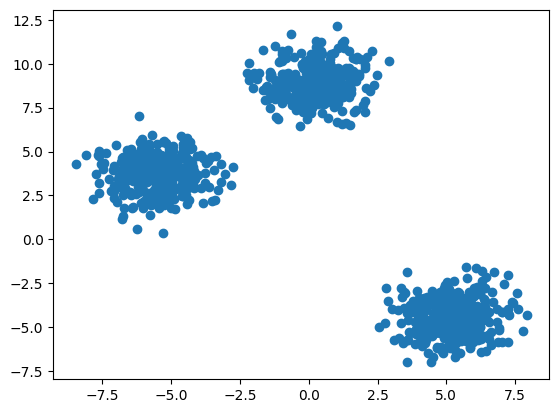

In [4]:
plt.scatter(X[:,0],X[:,1])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train)
  wcss.append(kmeans.inertia_)

In [8]:
wcss

[34827.576825520235,
 7935.437286145425,
 1319.2730531585605,
 1171.3515234484616,
 1034.5927982513729,
 926.7566843563493,
 768.0294733032365,
 729.3386845321348,
 577.5241522384777,
 533.5010450816676]

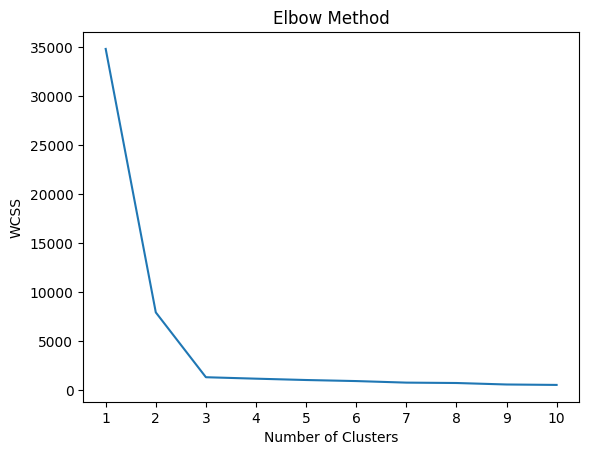

In [9]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3,init='k-means++')

In [11]:
y_labels = kmeans.fit_predict(X_train)

In [14]:
y_test_labels = kmeans.predict(X_test)

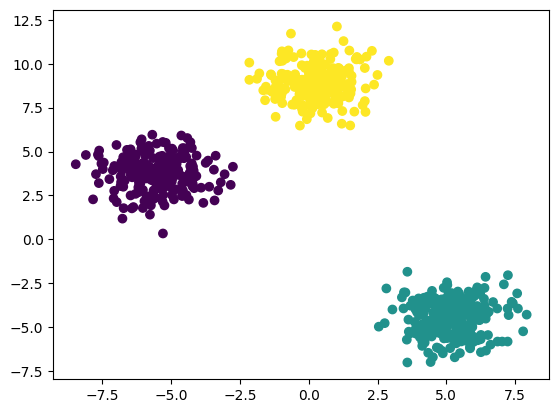

In [13]:
plt.scatter(X_train[:,0],X_train[:,1], c= y_labels)

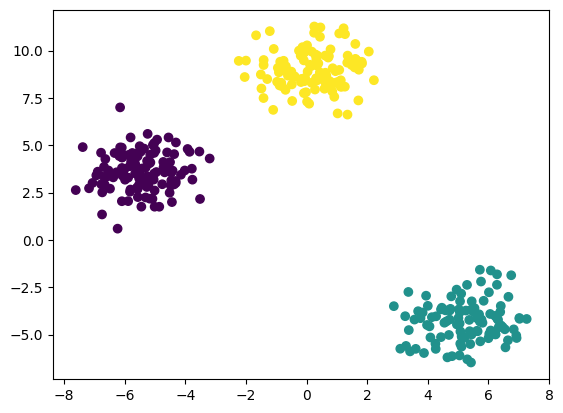

In [15]:
plt.scatter(X_test[:,0],X_test[:,1], c= y_test_labels)

In [17]:
##knee locator
!pip install kneed

In [19]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [22]:
##Performance metrics
from sklearn.metrics import silhouette_score
silhouette_coeff = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i,init='k-means++')
  kmeans.fit(X_train)
  score = silhouette_score(X_train,kmeans.labels_)
  silhouette_coeff.append(score)

silhouette_coeff

[0.7281443868598331,
 0.8071181203797672,
 0.650019767499954,
 0.4508219849427402,
 0.46676795625658,
 0.4833953243790111,
 0.33805610022362226,
 0.3339045234773831,
 0.3347829022890044]